# EDA and regression analysis  of Graduate Admission data

The data focuses on the various parameter necessary for a student to secure admission.
In this project we will carry general data anaylysis followed by linear regression to infer which parameter is has the most influence on the admission.
[Data can be found here](https://www.kaggle.com/mohansacharya/graduate-admissions)

**First load the data and carry out general analysis to understand it further**

In [1]:
#importing imoprtant libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv('Admission_data.csv',index_col='Serial No.') #loading data using pandas

In [3]:
data.head(10) #checking first 10 rows of the data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
9,302,102,1,2.0,1.5,8.00,0,0.50


In [4]:
data.shape #(rows,columns)

(500, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [6]:
data.describe() #statistical values of the data 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.isna().any() #checking for any missing values in the dataframe

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [8]:
data.corr() #looking at the correlation between different features of the data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


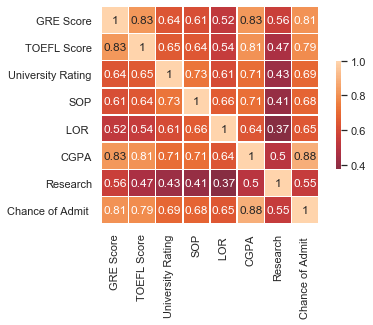

In [9]:
# Draw the heatmap
sns.heatmap(data.corr(),center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


From the correlation matrix it can be determined that the GRE scores, TOEFL scores and CGPA has a huge impact on the chance of admit in a graduate program.

In [10]:
main_factors= ['GRE Score','TOEFL Score','CGPA'] 

In [11]:
q3 = data['Chance of Admit '].quantile(q=0.80)   #creating a column high chance in the dataframe fro convenience
data['High Chance'] = data['Chance of Admit '].apply(lambda x: 1 if x>= q3 else 0)

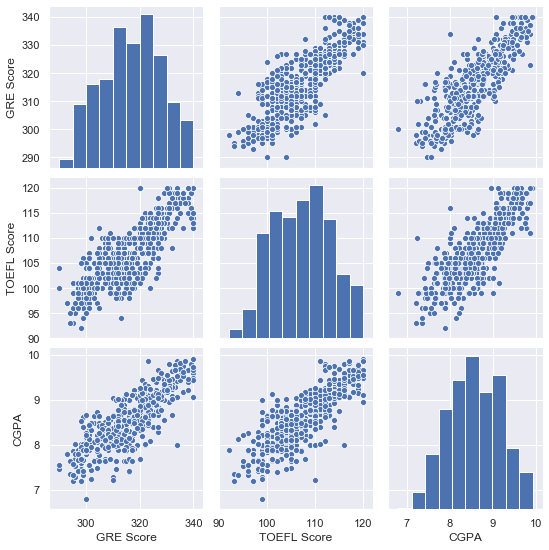

In [12]:
sns.pairplot(data[main_factors])

**Visualization of the main factors**

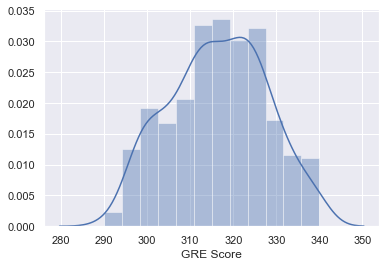

In [13]:
sns.distplot(data['GRE Score'],kde=True)

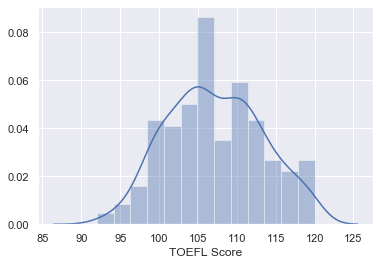

In [14]:
sns.distplot(data['TOEFL Score'],kde=True)

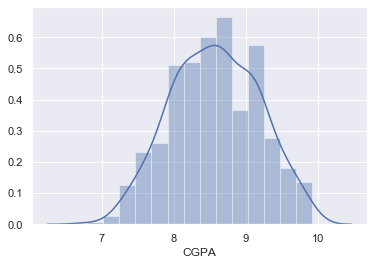

In [15]:
sns.distplot(data['CGPA'],kde=True)

**Relation between main factors and chance of admit**

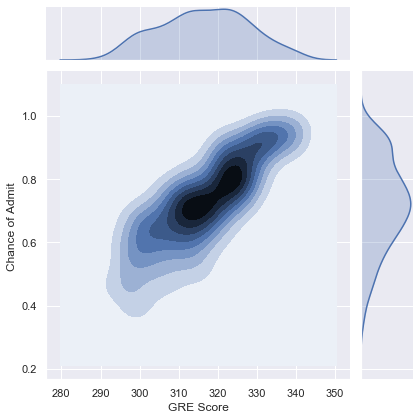

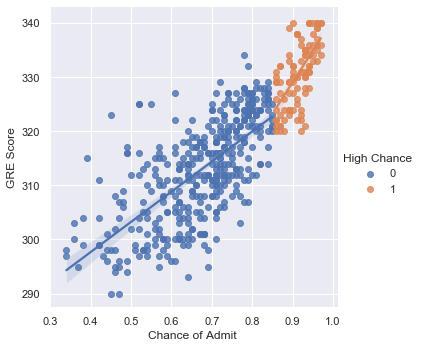

In [16]:
sns.jointplot(data=data,x="GRE Score",y='Chance of Admit ',kind="kde")
sns.lmplot(data=data,y="GRE Score",x='Chance of Admit ',hue="High Chance")
plt.show()

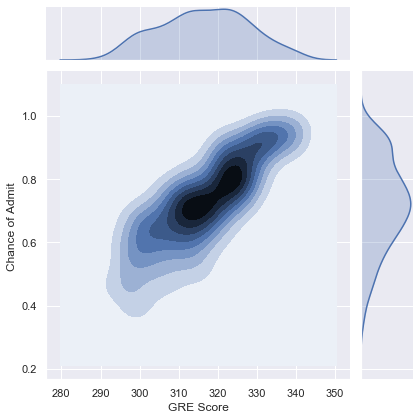

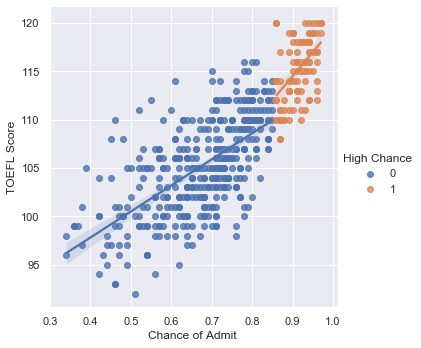

In [17]:
sns.jointplot(data=data,x="GRE Score",y='Chance of Admit ',kind="kde")
sns.lmplot(data=data,y="TOEFL Score",x='Chance of Admit ',hue="High Chance")
plt.show()

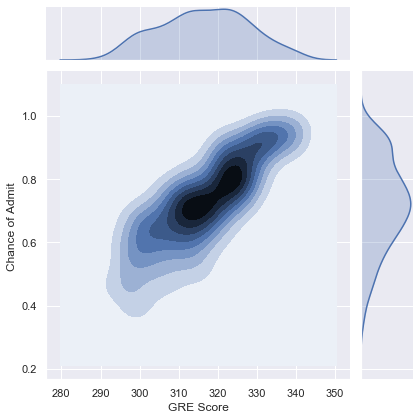

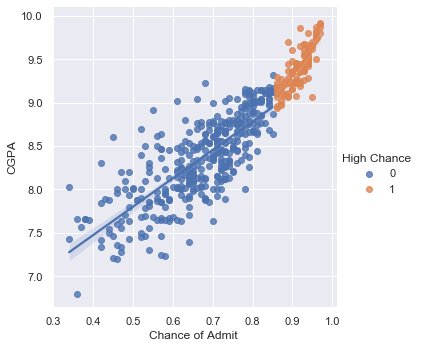

In [18]:
sns.jointplot(data=data,x="GRE Score",y='Chance of Admit ',kind="kde")
sns.lmplot(data=data,y="CGPA",x='Chance of Admit ',hue="High Chance")
plt.show()

It can be seen from the visuals above that hainh a higher GRE, TOEFL and CGPA increase the chances of admission

**Relation between CGPA, TOEFL and GRE scores**

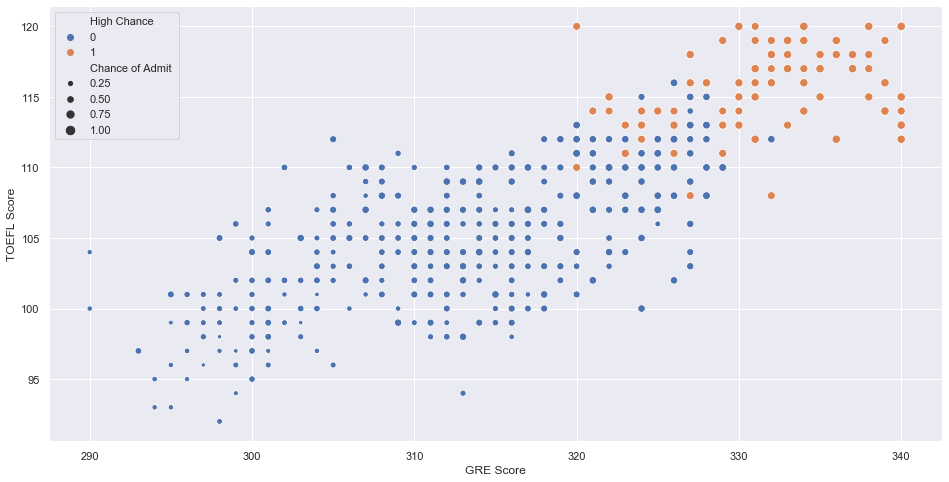

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='GRE Score',y='TOEFL Score',data=data,hue='High Chance',size='Chance of Admit ')

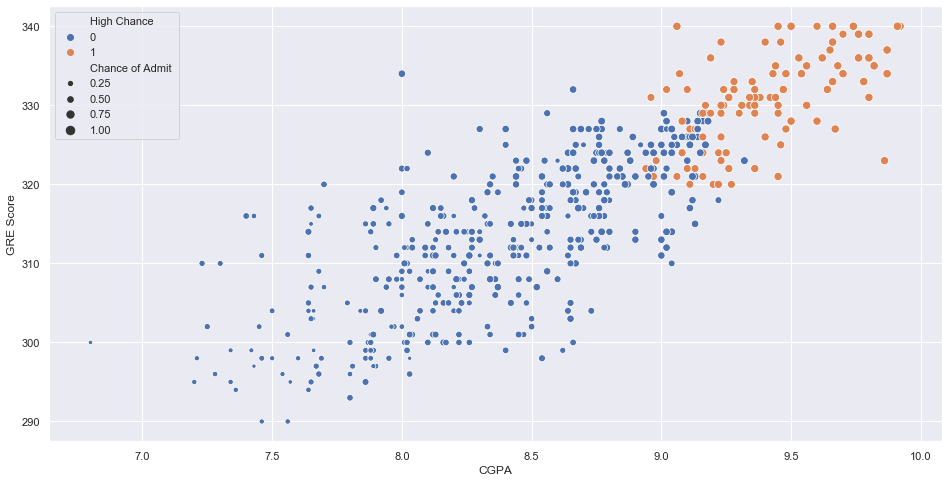

In [20]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='CGPA',y='GRE Score',data=data,hue='High Chance',size='Chance of Admit ')

It is inferred that the students having a higher cgpa tend to have better GRE and TOEFL scores

**Relation of the main factors with the University rating**

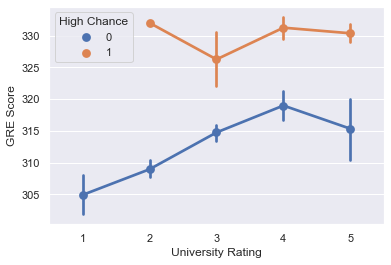

In [21]:
# relation of GRE sore with the rating
sns.pointplot('University Rating','GRE Score',data=data,hue='High Chance')

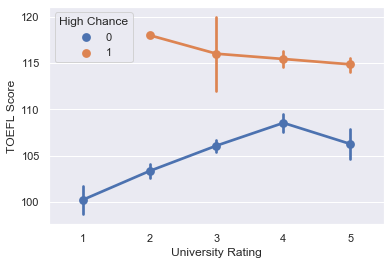

In [22]:
#relation of TOEFL sore with the rating
sns.pointplot('University Rating','TOEFL Score',data=data,hue='High Chance')

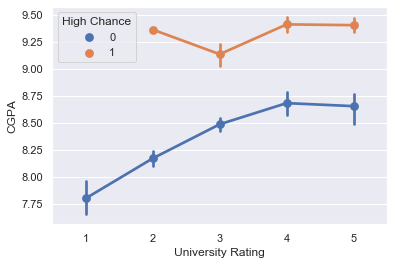

In [23]:
#relation of CGPA with the rating
sns.pointplot('University Rating','CGPA',data=data,hue='High Chance')

As the plots depict the higher the university rating higher scores is needed to get admission.

**Splitting the data in test and train and initializing regression**

In [24]:
selected_data= data.drop('High Chance',axis=1)

In [25]:
from sklearn.model_selection import train_test_split
#splitting the data into test and train using the train_test_split 
X = selected_data.drop(['Chance of Admit '], axis=1)
y = selected_data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.45, shuffle=False,random_state=0)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#initalizing the model with linear and randomforest regression
models = [['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()]]
           
print("Results...") #printing the results

#fitting the regressions with the training data
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test) #predicting the data
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
Linear Regression : 0.051329277779076234
RandomForest : 0.05891546184529526


**Using RandomForestegressor to get the important features from the data**

In [27]:
rfr = RandomForestRegressor()
rfr.fit(X,y)
features = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = rfr.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

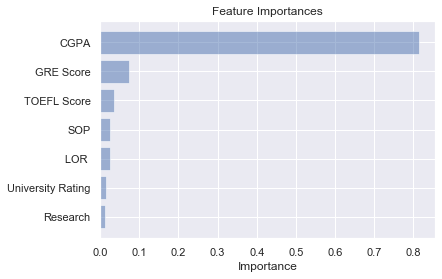

In [28]:
#Plotting the important feature with relevant imoprtance
plt.barh([1,2,3,4,5,6,7],importance_frame['Importance'],alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**Conclusion**

It is clear from the importance figure that having a higher CGPA leads to a better chance of admit in graduate school applications along with GRE and TOEFL scores.